<a href="https://colab.research.google.com/github/sayedmurtaza24/Deep-Learning-Notebooks/blob/main/Used_Cars_USA_Regression_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Used Vehicles Dataset USA - Price prediction using TensorFlow

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Read the csv => save it to a separate variable
vehicles_dataset_original = pd.read_csv("drive/MyDrive/vehicles.csv").sample(frac=0.1, random_state=30)

In [114]:
# copy the variable to keep the original in case I mess up
vehicles_dataset = vehicles_dataset_original.copy(deep=True)
# vehicles_dataset.info()

In [90]:
# unwanted columns drop here
vehicles_dataset.drop('region_url', axis=1, inplace=True)
vehicles_dataset.drop('id', axis=1, inplace=True)
vehicles_dataset.drop('url', axis=1, inplace=True)
vehicles_dataset.drop('VIN', axis=1, inplace=True)
vehicles_dataset.drop('image_url', axis=1, inplace=True)
vehicles_dataset.drop('description', axis=1, inplace=True)
# vehicles_dataset.drop('model', axis=1, inplace=True)
vehicles_dataset.drop('size', axis=1, inplace=True)
vehicles_dataset.drop('county', axis=1, inplace=True)

In [91]:
vehicles_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42688 entries, 250614 to 328456
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        42688 non-null  object 
 1   price         42688 non-null  int64  
 2   year          42561 non-null  float64
 3   manufacturer  40985 non-null  object 
 4   model         42188 non-null  object 
 5   condition     25263 non-null  object 
 6   cylinders     24973 non-null  object 
 7   fuel          42372 non-null  object 
 8   odometer      42223 non-null  float64
 9   title_status  41844 non-null  object 
 10  transmission  42414 non-null  object 
 11  drive         29617 non-null  object 
 12  type          33418 non-null  object 
 13  paint_color   29585 non-null  object 
 14  state         42688 non-null  object 
 15  lat           42003 non-null  float64
 16  long          42003 non-null  float64
 17  posting_date  42683 non-null  object 
dtypes: float64(4), int64

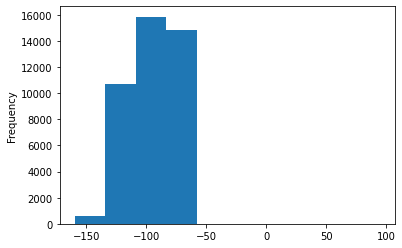

In [92]:
vehicles_dataset['long'].plot(kind='hist')

In [93]:
vehicles_dataset[vehicles_dataset['long'] > -50].shape

(16, 18)

In [94]:
vehicles_dataset[vehicles_dataset['odometer'] < 200000]['odometer'].max()

199999.0

In [95]:
# fill out missing values
vehicles_dataset['condition'].fillna('good', inplace=True)
vehicles_dataset['cylinders'].fillna('6 cylinders', inplace=True)
vehicles_dataset['drive'].fillna('4wd', inplace=True)
# vehicles_dataset['size'].fillna('full-size', inplace=True)
vehicles_dataset['type'].fillna('sedan', inplace=True)
vehicles_dataset['paint_color'].fillna('white', inplace=True)
vehicles_dataset.dropna(inplace=True)

In [96]:
# getting rid of redundant data and false data
vehicles_dataset = vehicles_dataset[vehicles_dataset['price'] > 199]
vehicles_dataset = vehicles_dataset[vehicles_dataset['price'] < 60000]
vehicles_dataset = vehicles_dataset[vehicles_dataset['odometer'] < 200000]
vehicles_dataset = vehicles_dataset[vehicles_dataset['lat'] > 9]
vehicles_dataset = vehicles_dataset[vehicles_dataset['long'] < -50]

vehicles_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32771 entries, 80041 to 328456
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        32771 non-null  object 
 1   price         32771 non-null  int64  
 2   year          32771 non-null  float64
 3   manufacturer  32771 non-null  object 
 4   model         32771 non-null  object 
 5   condition     32771 non-null  object 
 6   cylinders     32771 non-null  object 
 7   fuel          32771 non-null  object 
 8   odometer      32771 non-null  float64
 9   title_status  32771 non-null  object 
 10  transmission  32771 non-null  object 
 11  drive         32771 non-null  object 
 12  type          32771 non-null  object 
 13  paint_color   32771 non-null  object 
 14  state         32771 non-null  object 
 15  lat           32771 non-null  float64
 16  long          32771 non-null  float64
 17  posting_date  32771 non-null  object 
dtypes: float64(4), int64(

In [97]:
vehicles_dataset.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date
80041,fort collins / north CO,33599,2018.0,jeep,wrangler unlimited,good,6 cylinders,gas,32372.0,clean,automatic,4wd,SUV,grey,co,39.730500,-105.191500,2021-04-15T14:58:18-0600
341025,york,6950,2012.0,chevrolet,cruze,excellent,6 cylinders,gas,124210.0,clean,automatic,fwd,sedan,black,pa,40.021763,-76.545685,2021-04-29T15:31:30-0400
238328,greensboro,10999,2013.0,kia,sorento sx,good,6 cylinders,gas,143300.0,clean,automatic,fwd,SUV,grey,nc,35.531019,-79.186357,2021-04-09T17:10:44-0400
134567,lewiston / clarkston,29999,2006.0,jeep,lifted wrangler unlimited,good,6 cylinders,gas,68545.0,clean,manual,4wd,SUV,brown,id,47.656130,-117.236949,2021-05-01T08:47:44-0700
154203,richmond,12495,2019.0,honda,civic,like new,4 cylinders,gas,15300.0,rebuilt,automatic,fwd,sedan,silver,in,41.473500,-81.739800,2021-05-02T17:59:50-0400


In [98]:
vd_dates = pd.to_datetime(vehicles_dataset['posting_date'], errors='coerce', utc=True).dt
vehicles_dataset['posting_year'] = vd_dates.year
vehicles_dataset['posting_month'] = vd_dates.month
vehicles_dataset['posting_day'] = vd_dates.day

In [99]:
vehicles_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32771 entries, 80041 to 328456
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   region         32771 non-null  object 
 1   price          32771 non-null  int64  
 2   year           32771 non-null  float64
 3   manufacturer   32771 non-null  object 
 4   model          32771 non-null  object 
 5   condition      32771 non-null  object 
 6   cylinders      32771 non-null  object 
 7   fuel           32771 non-null  object 
 8   odometer       32771 non-null  float64
 9   title_status   32771 non-null  object 
 10  transmission   32771 non-null  object 
 11  drive          32771 non-null  object 
 12  type           32771 non-null  object 
 13  paint_color    32771 non-null  object 
 14  state          32771 non-null  object 
 15  lat            32771 non-null  float64
 16  long           32771 non-null  float64
 17  posting_date   32771 non-null  object 
 18  p

In [100]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), ['region', 'model', 'manufacturer', 'condition', 'cylinders', 'fuel',
                                              'title_status', 'transmission', 'drive', 'type', 'paint_color',
                                              'state']),
    ('passthrough', ['year', 'odometer', 'lat', 'long', 'posting_year', 'posting_month', 'posting_day']),
    sparse_threshold=0
)

X = vehicles_dataset.drop('price', axis=1)
y = vehicles_dataset['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal.max()

199999.0

In [101]:
X_train_normal.shape

(26216, 6017)

In [104]:
tf.random.set_seed(30)

normalization_layer = tf.keras.layers.Normalization()
normalization_layer.adapt(X_train_normal)

model = tf.keras.Sequential([
  normalization_layer,
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.mean_absolute_error,
              metrics=['mae'])

# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-5 * 10 ** (epoch / 15))

history = model.fit(X_train_normal, y_train, epochs=100, validation_data=(X_test_normal, y_test))

Epoch 1/100
820/820 [==============================] - 8s 10ms/step - loss: 18978.9102 - mae: 18978.9102 - val_loss: 18664.6387 - val_mae: 18664.6387
Epoch 2/100
820/820 [==============================] - 11s 13ms/step - loss: 19011.5273 - mae: 19011.5273 - val_loss: 18647.4707 - val_mae: 18647.4707
Epoch 3/100
820/820 [==============================] - 8s 10ms/step - loss: 18643.6172 - mae: 18643.6172 - val_loss: 15540.2021 - val_mae: 15540.2021
Epoch 4/100
820/820 [==============================] - 9s 10ms/step - loss: 15573.5537 - mae: 15573.5537 - val_loss: 10190.2578 - val_mae: 10190.2578
Epoch 5/100
820/820 [==============================] - 8s 10ms/step - loss: 11729.0791 - mae: 11729.0791 - val_loss: 7841.2358 - val_mae: 7841.2358
Epoch 6/100
820/820 [==============================] - 8s 10ms/step - loss: 8779.4336 - mae: 8779.4336 - val_loss: 6391.9697 - val_mae: 6391.9697
Epoch 7/100
820/820 [==============================] - 8s 9ms/step - loss: 6363.0005 - mae: 6363.0005 - v

In [45]:
# pd.DataFrame(history.history).columns
# model.fit(X_train_normal, y_train, epochs=10, validation_data=(X_test_normal, y_test))

Index(['loss', 'mae', 'val_loss', 'val_mae', 'lr'], dtype='object')

In [113]:
# import matplotlib.pyplot as plt
# import numpy as np
# plt.figure(figsize=(10, 7))
# plt.semilogx(history.history['lr'], np.log(history.history['loss']))

In [106]:
# see how the model performs
model.evaluate(X_test_normal, y_test)

205/205 [==============================] - 1s 3ms/step - loss: 4429.0024 - mae: 4429.0024


[4429.00244140625, 4429.00244140625]

In [107]:
# see difference ranges in prediction vs ground truth
preds = tf.squeeze(model.predict(X_test_normal))
truth = tf.constant(y_test, dtype=tf.float32)
diff = pd.DataFrame(tf.abs(truth - preds), columns=['Difference'])

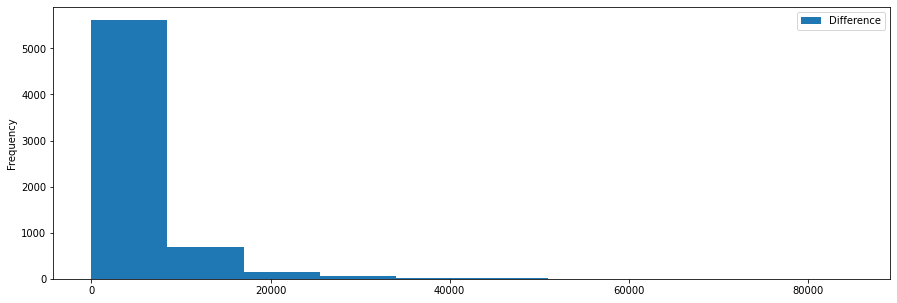

In [108]:
diff.plot(kind='hist', figsize=(15, 5));

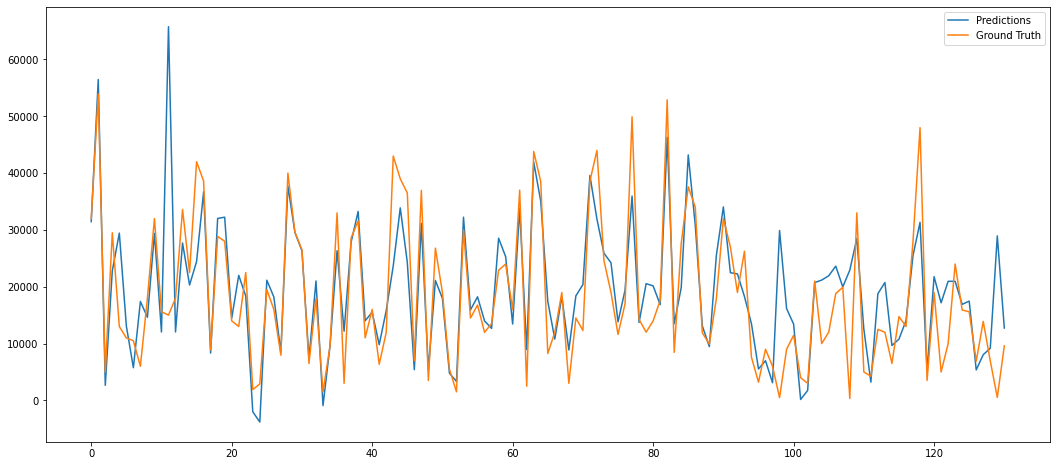

In [111]:
# compare a fraction of actual values to see how it aligns with ground truth
comp = pd.DataFrame({'Predictions': tf.squeeze(model.predict(X_test_normal)), 'Ground Truth': y_test}).sample(frac=0.02)
comp = comp.reset_index(drop=True)
comp.plot(kind='line', figsize=(18, 8));